## ***Business Case: Delhivery - Feature Engineering***


## **Introduction:**
- Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system.
- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.
- They achieve this by utilizing world-class infrastructure, ensuring the highest quality in logistics operations, and harnessing cutting-edge engineering and technology capabilities.

**From Delhivery’s Perspective:**
- Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.
- It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.
- First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
- Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
- Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
- By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('delhivery_data.csv')

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.shape

(71002, 24)

In [5]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71002 entries, 0 to 71001
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            71002 non-null  object 
 1   trip_creation_time              71002 non-null  object 
 2   route_schedule_uuid             71001 non-null  object 
 3   route_type                      71001 non-null  object 
 4   trip_uuid                       71001 non-null  object 
 5   source_center                   71001 non-null  object 
 6   source_name                     70843 non-null  object 
 7   destination_center              71001 non-null  object 
 8   destination_name                70902 non-null  object 
 9   od_start_time                   71001 non-null  object 
 10  od_end_time                     71001 non-null  object 
 11  start_scan_to_end_scan          71001 non-null  float64
 12  is_cutoff                       

In [7]:
df.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,is_cutoff,cutoff_timestamp
count,71002,71002,71001,71001,71001,71001,70843,71001,70902,71001,71001,71001,71001
unique,2,7264,1358,2,7264,1394,1385,1361,1349,12922,12922,2,53839
top,training,2018-10-01 05:04:55.268931,thanos::sroute:dca6268f-741a-4d1a-b1b0-aab1309...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,True,2018-09-24 05:19:20
freq,51040,101,764,48670,101,11029,11029,7466,7466,81,81,58204,21


In [8]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [9]:
# Datetime Formatting for datetime columns

df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'], format='mixed')

In [10]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [11]:
#Missing Value Analysis
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,1
route_type,1
trip_uuid,1
source_center,1
source_name,159
destination_center,1
destination_name,100
od_start_time,1


Observations
- Source name and Destination name have missing values
as we have very records having missing value, we can drop those rows from analysis

In [12]:
# drop missing values
df.drop(df[df['source_name'].isna() | df['destination_name'].isna()].index , inplace=True)

In [13]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


## **Trip Segment Analysis**
- delivery details of one package is divided into several rows (think of it as connecting flights to reach a particular destination) we should find way to identify unique trip details for source_destination to understand delivery data.
- we can create unique identifier for different segment of a trip based on combination of trip_uuid, source_center and destination_center, we will call it as segment key

- Based on segment_key we will create new aggregated columns segment_actual_time,segment_osrm_distance,segment_osrm_time

In [14]:
df['segment_key']=df.apply(lambda x:"#".join([x['trip_uuid'],x['source_center'],x['destination_center']]), axis=1)

In [15]:
# sample=df[(df['route_schedule_uuid']=='thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef') & (df['trip_uuid']=='trip-153741093647649320')]
# sample[['source_name','destination_name','od_start_time','od_start_time','od_end_time','start_scan_to_end_scan','is_cutoff','actual_distance_to_destination','actual_time','segment_osrm_time','segment_osrm_distance']]
# sample.head(20)
# sample.columns

In [16]:
df['segment_actual_time_cumsum']=df.groupby('segment_key')['segment_actual_time'].transform(lambda x:x.cumsum())

df['segment_osrm_time_cumsum']=df.groupby('segment_key')['segment_osrm_time'].transform(lambda x:x.cumsum())

df['segment_osrm_distance_cumsum']=df.groupby('segment_key')['segment_osrm_distance'].transform(lambda x:x.cumsum())

In [17]:
# df.groupby('segment_key')['segment_actual_time_sum'].nth(-1)

In [18]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance_cumsum'].transform(lambda x:x.iloc[-1])

In [19]:
df=df.sort_values(by=['segment_key','od_end_time'])
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
66268,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,10.0,10.8633,1.800000,trip-153671042288605164#IND561203AAB#IND562101AAA,18.0,10.0,10.8633,46.0,26.0,28.1995
66269,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,9.0,10.3898,1.444444,trip-153671042288605164#IND561203AAB#IND562101AAA,31.0,19.0,21.2531,46.0,26.0,28.1995
66270,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,7.0,6.9464,2.142857,trip-153671042288605164#IND561203AAB#IND562101AAA,46.0,26.0,28.1995,46.0,26.0,28.1995
66262,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,8.0,10.3544,1.750000,trip-153671042288605164#IND572101AAA#IND561203AAB,14.0,8.0,10.3544,95.0,39.0,55.9899
66263,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,6.0,9.7887,1.666667,trip-153671042288605164#IND572101AAA#IND561203AAB,24.0,14.0,20.1431,95.0,39.0,55.9899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18729,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,...,0.0,0.1847,-1.000000,trip-153861106442901555#IND209304AAA#IND208006AAA,91.0,52.0,69.4497,91.0,52.0,69.4497
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,17.0,23.9866,2.647059,trip-153861118270144424#IND583119AAA#IND583101AAA,45.0,17.0,23.9866,233.0,42.0,52.5303
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,25.0,28.5437,7.520000,trip-153861118270144424#IND583119AAA#IND583101AAA,233.0,42.0,52.5303,233.0,42.0,52.5303
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,21.0,23.2367,1.428571,trip-153861118270144424#IND583201AAA#IND583119AAA,30.0,21.0,23.2367,41.0,25.0,28.0484


## **Feature Engineering**

In [20]:
df['od_time_diff_hour']=(df['od_end_time']-df['od_start_time'])/pd.Timedelta(hours=1)

In [21]:
#Extract City, Place, Code and State Information
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

In [22]:
df['trip_creation_year']=df['trip_creation_time'].dt.year
df['trip_creation_month']=df['trip_creation_time'].dt.month
df['trip_creation_day']=df['trip_creation_time'].dt.day

In [76]:
import re

def get_state(name):
    pattern="\([A-Za-z]+\s?\w+\)"
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    state=state.replace("(","")
    state=state.replace(")","")
    return state

In [77]:
import re

def get_city(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    city_place_code=name.replace(state,'')
    city_place_code_parts=city_place_code.split("_")
    if len(city_place_code_parts)==1 :
        city=city_place_code_parts[0].strip()
    elif len(city_place_code_parts)==2:
        city=city_place_code.strip()
    elif len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
        city=city_place_code_parts[0].strip()
    else:
        city=city_place_code
    return city

In [78]:
import re

def get_place(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
            place=city_place_code_parts[1].strip()
        else:
            place=None
        return place
    except Exception as exp:
        return None

In [79]:
import re

def get_code(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 :
            code=city_place_code_parts[2].strip()
        elif  len(city_place_code_parts)==4:
            code="_".join(city_place_code_parts[2:]).strip()
        else:
            code=None
        return code
    except Exception as exp:
        return None

In [80]:
df['destination_state']=df['destination_name'].map(get_state)
df['source_state']=df['source_name'].map(get_state)

In [81]:
df['destination_place']=df['destination_name'].map(get_place)
df['source_place']=df['source_name'].map(get_place)

In [82]:
df['destination_code']=df['destination_name'].map(get_code)
df['source_code']=df['source_name'].map(get_code)

## **In-depth analysis:**
- Grouping and Aggregating at Trip-level

a. Groups the segment data by the trip_uuid column to focus on aggregating data at the trip level.

b. Apply suitable aggregation functions like first, last, and sum specified in the create_trip_dict dictionary to calculate summary statistics for each trip.

In [31]:
# df2=df[['trip_uuid','segment_key','actual_distance_to_destination', 'actual_time','osrm_time', 'osrm_distance',
#    'segment_actual_time','segment_osrm_time', 'segment_osrm_distance',
#    'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
#         'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
#         'segment_osrm_time_sum', 'segment_osrm_distance_sum','od_time_diff_hour','od_start_time','od_end_time']]


In [32]:
# df2=df2[df2['trip_uuid']=='trip-153741093647649320']
# df2

- actual_time aggregated value and OSRM time aggregated value.
- actual_time aggregated value and segment actual time aggregated value.
- OSRM distance aggregated value and segment OSRM distance aggregated value.
- OSRM time aggregated value and segment OSRM time aggregated value.

In [33]:
trip_actual_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_actual_time_sum=('actual_time','sum')).reset_index()
trip_actual_time_sum_df

,trip_uuid,trip_actual_time_sum
0,trip-153671042288605164,143.0
1,trip-153671055416136166,61.0
2,trip-153671074033284934,161.0
3,trip-153671079956500691,23.0
4,trip-153671110078355292,17.0
...,...,...
7247,trip-153861090163768194,42.0
7248,trip-153861095625827784,83.0
7249,trip-153861104386292051,21.0
7250,trip-153861106442901555,282.0


In [34]:
trip_segment_actual_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_actual_time_sum=('segment_actual_time_sum','sum')).reset_index()
trip_segment_actual_time_sum_df

,trip_uuid,trip_segment_actual_time_sum
0,trip-153671042288605164,141.0
1,trip-153671055416136166,60.0
2,trip-153671074033284934,161.0
3,trip-153671079956500691,23.0
4,trip-153671110078355292,17.0
...,...,...
7247,trip-153861090163768194,41.0
7248,trip-153861095625827784,82.0
7249,trip-153861104386292051,21.0
7250,trip-153861106442901555,281.0


In [35]:
trip_segment_osrm_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_time_sum=('segment_osrm_time_sum','sum')).reset_index()
trip_segment_osrm_time_sum_df

,trip_uuid,trip_segment_osrm_time_sum
0,trip-153671042288605164,65.0
1,trip-153671055416136166,23.0
2,trip-153671074033284934,29.0
3,trip-153671079956500691,14.0
4,trip-153671110078355292,9.0
...,...,...
7247,trip-153861090163768194,11.0
7248,trip-153861095625827784,62.0
7249,trip-153861104386292051,11.0
7250,trip-153861106442901555,88.0


In [36]:
trip_segment_osrm_distance_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_distance_sum=('segment_osrm_distance_sum','sum')).reset_index()
trip_segment_osrm_distance_sum_df

,trip_uuid,trip_segment_osrm_distance_sum
0,trip-153671042288605164,84.1894
1,trip-153671055416136166,28.0647
2,trip-153671074033284934,30.9358
3,trip-153671079956500691,16.0860
4,trip-153671110078355292,10.8159
...,...,...
7247,trip-153861090163768194,15.8436
7248,trip-153861095625827784,64.8551
7249,trip-153861104386292051,16.0883
7250,trip-153861106442901555,104.8866


In [37]:
trip_osrm_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_time_sum=('osrm_time','sum')).reset_index()
trip_osrm_time_sum_df

,trip_uuid,trip_osrm_time_sum
0,trip-153671042288605164,68.0
1,trip-153671055416136166,23.0
2,trip-153671074033284934,29.0
3,trip-153671079956500691,8.0
4,trip-153671110078355292,9.0
...,...,...
7247,trip-153861090163768194,12.0
7248,trip-153861095625827784,62.0
7249,trip-153861104386292051,12.0
7250,trip-153861106442901555,48.0


In [38]:
trip_osrm_distance_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_distance_sum=('osrm_distance','sum')).reset_index()
trip_osrm_distance_sum_df

,trip_uuid,trip_osrm_distance_sum
0,trip-153671042288605164,85.1110
1,trip-153671055416136166,28.0647
2,trip-153671074033284934,30.9359
3,trip-153671079956500691,9.9566
4,trip-153671110078355292,10.8159
...,...,...
7247,trip-153861090163768194,15.8436
7248,trip-153861095625827784,73.4630
7249,trip-153861104386292051,16.0882
7250,trip-153861106442901555,58.9037


In [39]:
trip_total_time_in_hrs_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_total_time_in_hrs=('od_time_diff_hour','sum')).reset_index()
trip_total_time_in_hrs_df

,trip_uuid,trip_total_time_in_hrs
0,trip-153671042288605164,3.026865
1,trip-153671055416136166,3.174797
2,trip-153671074033284934,4.680733
3,trip-153671079956500691,0.822223
4,trip-153671110078355292,0.641675
...,...,...
7247,trip-153861090163768194,0.969532
7248,trip-153861095625827784,4.300482
7249,trip-153861104386292051,1.009842
7250,trip-153861106442901555,7.035331


In [40]:
# Combine all trip aggregated dataframes to single trip aggregations dataframe

trip_aggregated_df=pd.concat(
    objs=(
            iDF.set_index('trip_uuid') for iDF in (trip_actual_time_sum_df,trip_osrm_time_sum_df, trip_osrm_distance_sum_df,
                                                 trip_segment_actual_time_sum_df,trip_segment_osrm_time_sum_df,trip_segment_osrm_distance_sum_df,
                                                 trip_total_time_in_hrs_df)
         ),
    axis=1,
    join='inner'
).reset_index()
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
1,trip-153671055416136166,61.0,23.0,28.0647,60.0,23.0,28.0647,3.174797
2,trip-153671074033284934,161.0,29.0,30.9359,161.0,29.0,30.9358,4.680733
3,trip-153671079956500691,23.0,8.0,9.9566,23.0,14.0,16.0860,0.822223
4,trip-153671110078355292,17.0,9.0,10.8159,17.0,9.0,10.8159,0.641675
...,...,...,...,...,...,...,...,...
7247,trip-153861090163768194,42.0,12.0,15.8436,41.0,11.0,15.8436,0.969532
7248,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
7249,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
7250,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331


In [41]:
df=pd.merge(df,trip_aggregated_df, on='trip_uuid' )
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,destination_code,source_code,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,None,None,None,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,None,None,None,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,None,None,None,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,None,None,None,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
4,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,None,None,None,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70742,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,...,None,None,None,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
70743,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,None,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
70744,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,None,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
70745,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,None,None,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793


In [42]:
# df['trip_acutal_time_sum']=df['actual_time'].map(groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg({'actual_time':np.sum})

# Outlier Detection & Treatment
a. Find any existing outliers in numerical features.

b. Visualize the outlier values using Boxplot.

c. Handle the outliers using the IQR method.

- Perform one-hot encoding on categorical features.
- Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [43]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
1,trip-153671055416136166,61.0,23.0,28.0647,60.0,23.0,28.0647,3.174797
2,trip-153671074033284934,161.0,29.0,30.9359,161.0,29.0,30.9358,4.680733
3,trip-153671079956500691,23.0,8.0,9.9566,23.0,14.0,16.0860,0.822223
4,trip-153671110078355292,17.0,9.0,10.8159,17.0,9.0,10.8159,0.641675
...,...,...,...,...,...,...,...,...
7247,trip-153861090163768194,42.0,12.0,15.8436,41.0,11.0,15.8436,0.969532
7248,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
7249,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
7250,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331


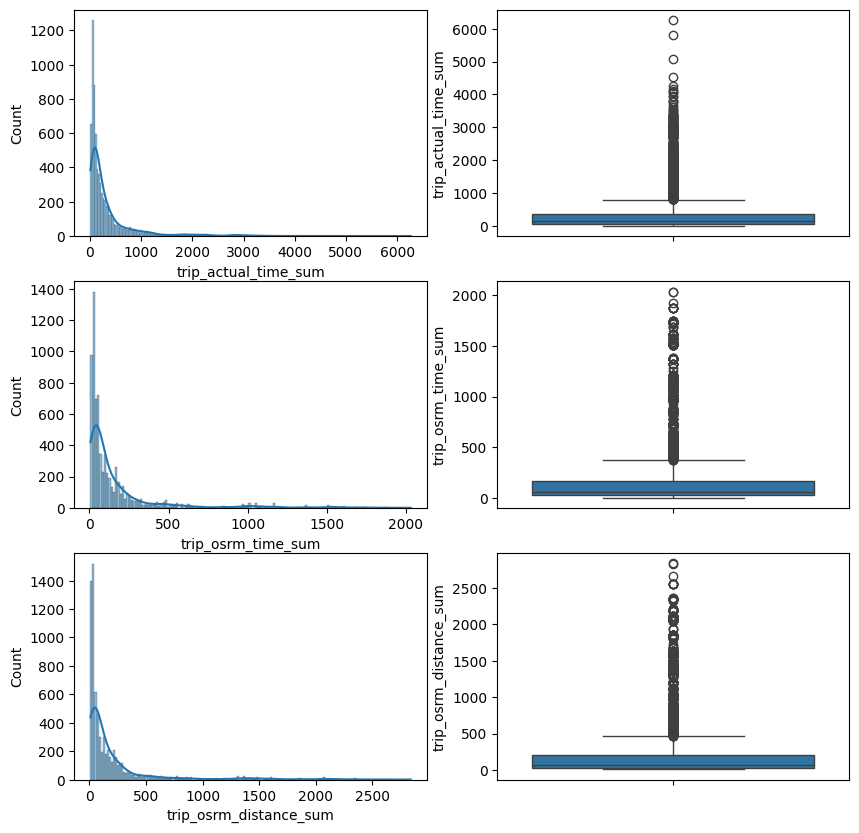

In [44]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip_aggregated_df['trip_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_osrm_distance_sum'])


plt.show()

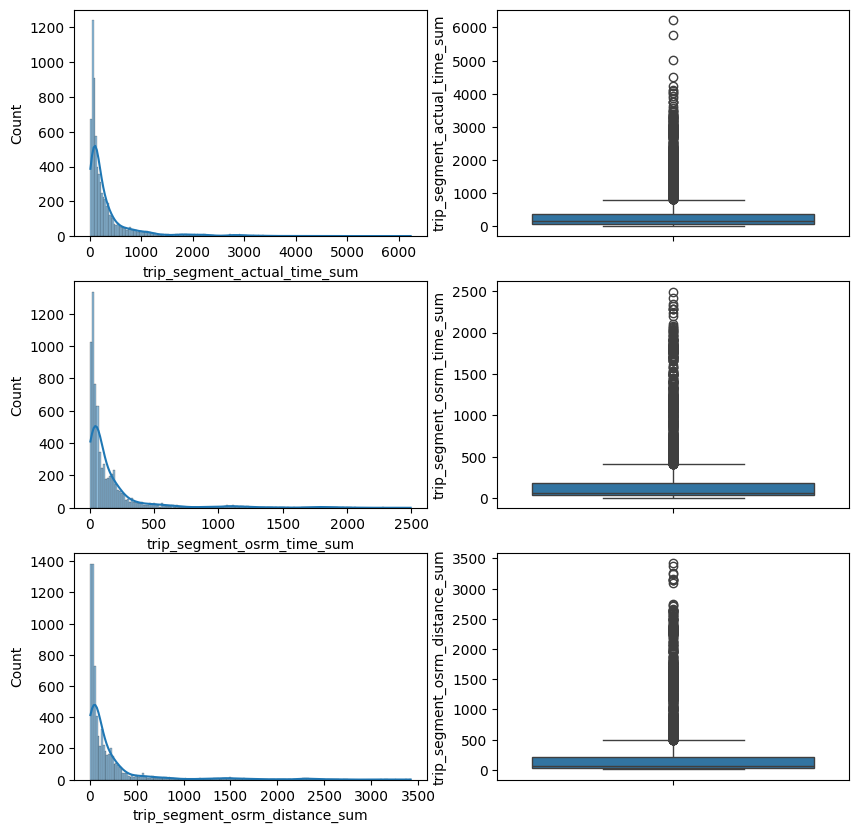

In [45]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data= trip_aggregated_df['trip_segment_actual_time_sum'])


sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_segment_osrm_distance_sum'])


plt.show()


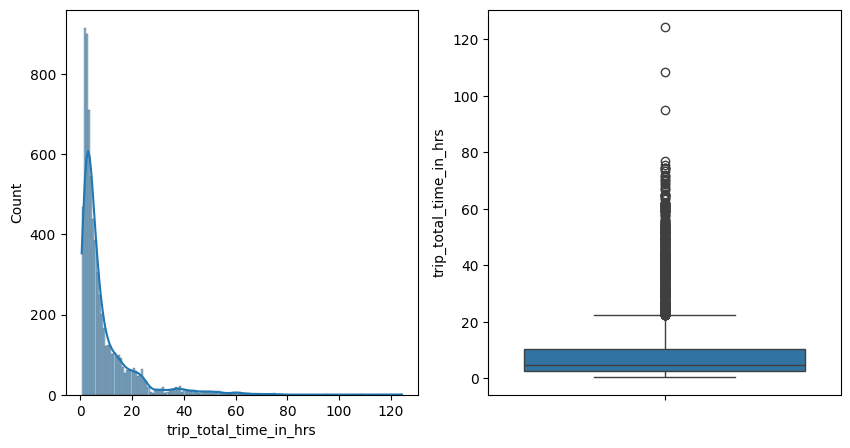

In [46]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_aggregated_df['trip_total_time_in_hrs'],kde=True)
sns.boxplot(ax=axs[1],data= trip_aggregated_df['trip_total_time_in_hrs'])
plt.show()

<Axes: xlabel='trip_actual_time_sum', ylabel='Count'>

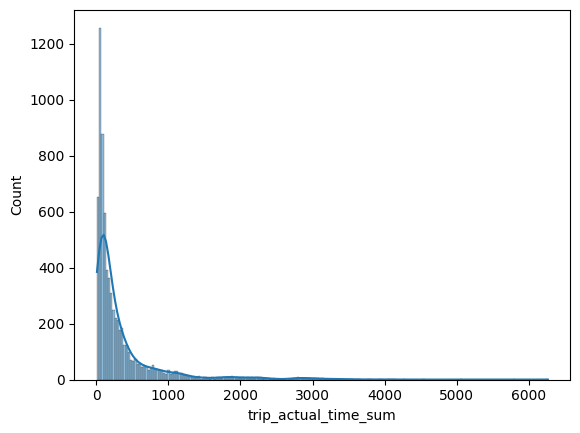

In [47]:
sns.histplot(data=trip_aggregated_df['trip_actual_time_sum'],kde=True)

<Axes: ylabel='trip_actual_time_sum'>

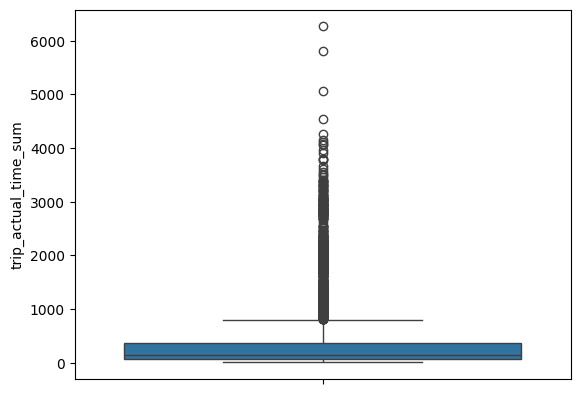

In [48]:
sns.boxplot(data=trip_aggregated_df['trip_actual_time_sum'])

Observations
- we have lots of outliers let's remove those outliers Based on IQR range, we will maxout values based on IQR range

In [49]:
def clip_value_helper(row,cl, Q1,Q3, minval, maxval):
    #     Q1=row[cl].quantile(0.25)
    #     Q3=row[cl].quantile(0.75)
    #     minval=min(row[cl])
    #     maxval=max(row[cl])
    IQR=Q3-Q1
    if row[cl]<Q1-1.5*IQR:
        return min(minval, Q1-1.5*IQR)
    elif row[cl] > Q3+1.5*IQR:
        return min(maxval, Q3+1.5*IQR)
    else:
        return row[cl]


In [50]:
trip_aggregated_df.columns

Index(['trip_uuid', 'trip_actual_time_sum', 'trip_osrm_time_sum',
       'trip_osrm_distance_sum', 'trip_segment_actual_time_sum',
       'trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum',
       'trip_total_time_in_hrs'],
      dtype='object')

In [52]:
for cl in ['trip_actual_time_sum', 'trip_osrm_time_sum', 'trip_osrm_distance_sum', 'trip_segment_actual_time_sum','trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum','trip_total_time_in_hrs']:
    Q1=trip_aggregated_df[cl].quantile(0.25)
    Q3=trip_aggregated_df[cl].quantile(0.75)
    minval=min(trip_aggregated_df[cl])
    maxval=max(trip_aggregated_df[cl])
    trip_aggregated_df[cl]=trip_aggregated_df.apply(lambda row:clip_value_helper(row,cl,
                                                                     Q1,Q3,minval, maxval) , axis=1)

In [53]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
1,trip-153671055416136166,61.0,23.0,28.0647,60.0,23.0,28.0647,3.174797
2,trip-153671074033284934,161.0,29.0,30.9359,161.0,29.0,30.9358,4.680733
3,trip-153671079956500691,23.0,8.0,9.9566,23.0,14.0,16.0860,0.822223
4,trip-153671110078355292,17.0,9.0,10.8159,17.0,9.0,10.8159,0.641675
...,...,...,...,...,...,...,...,...
7247,trip-153861090163768194,42.0,12.0,15.8436,41.0,11.0,15.8436,0.969532
7248,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
7249,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
7250,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331


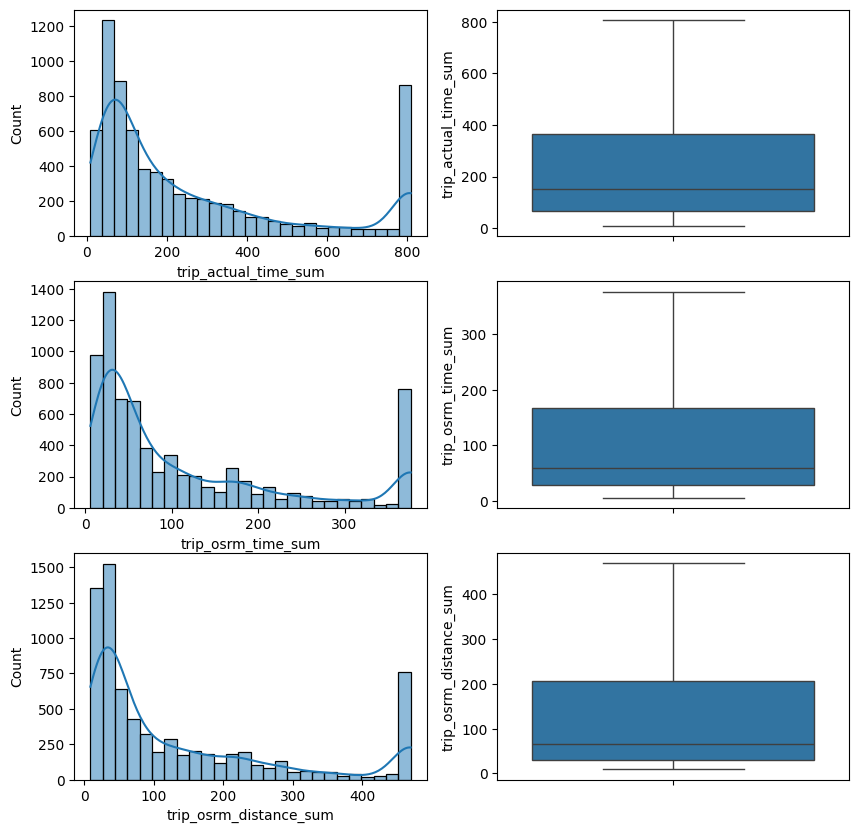

In [54]:
# After Clipping Outliers Based On IQR Distribution

import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip_aggregated_df['trip_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_osrm_distance_sum'])


plt.show()

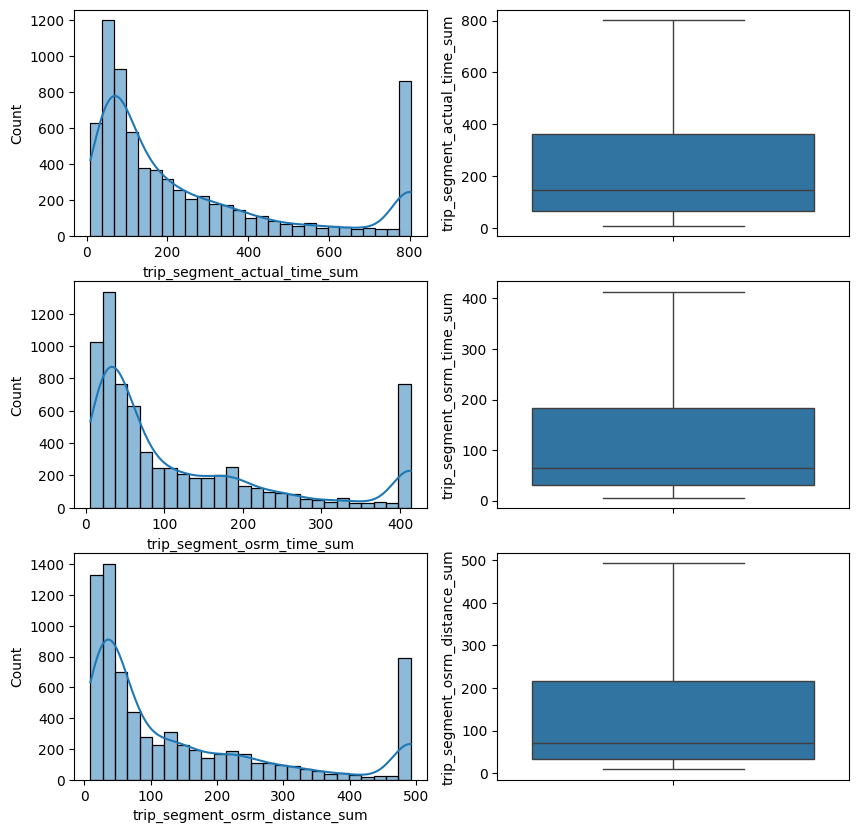

In [55]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data= trip_aggregated_df['trip_segment_actual_time_sum'])


sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_segment_osrm_distance_sum'])


plt.show()

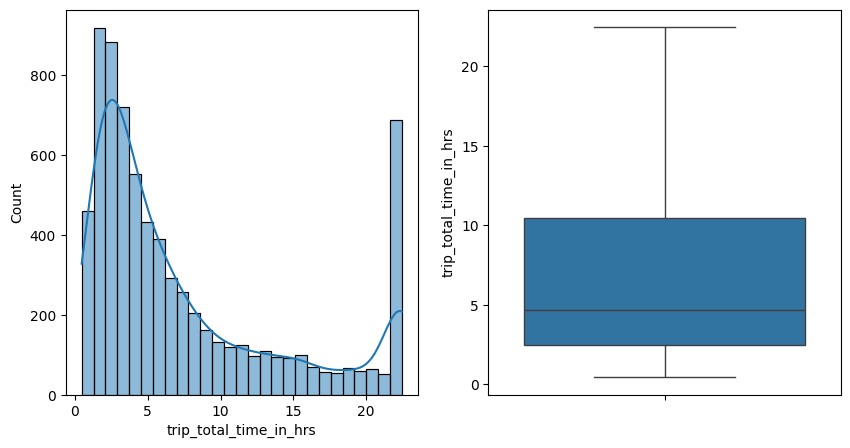

In [56]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_aggregated_df['trip_total_time_in_hrs'],kde=True)
sns.boxplot(ax=axs[1],data= trip_aggregated_df['trip_total_time_in_hrs'])
plt.show()

## **Hypothesis Testing**
a. actual_time aggregated value and OSRM time aggregated value.
</font>

we will use ttest paired sample test to know if there is significant difference in actual trip aggregated time and OSRM trip aggregated time for each trip

HO : mean Actual time to deliver package from source to destination is lesser than OSRM time for entire trip

HA: mean Actual time to deliver package from source to destination is greater than OSRM time

In [57]:
from scipy.stats import ttest_rel, ttest_ind

In [58]:
stat, pval=ttest_rel(trip_aggregated_df['trip_actual_time_sum'],
                     trip_aggregated_df['trip_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat 80.33039844988735 pval 0.0


In [59]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual time to deliver package from source to destination is greater than OSRM time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual time to deliver package from source to destination is lesser or equal  than OSRM time")

We will reject H0 :
mean Actual time to deliver package from source to destination is greater than OSRM time


In [60]:
np.mean(trip_aggregated_df['trip_actual_time_sum']), np.mean(trip_aggregated_df['trip_osrm_time_sum'])

(261.3796194153337, 114.68698290126862)

b. actual_time aggregated value and segment actual time aggregated value.

we will use ttest paired sample test to know if there is significant difference in actual trip aggregated time and segment actual time aggregated value for each trip

HO : mean Actual aggregated trip time to deliver package from source to destination is lesser than segment actual time aggregated value  for entire trip

HA: mean Actual aggregated trip time to deliver package from source to destination is greater than segment actual time aggregated value  for entire trip

In [61]:
stat, pval=ttest_rel(trip_aggregated_df['trip_actual_time_sum'],
                     trip_aggregated_df['trip_segment_actual_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat 87.38745221958905 pval 0.0


In [62]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip aggregated time   to deliver package from source to destination is greater than segment actual aggregated time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated time to deliver package from source to destination is lesser or equal  than segment actual aggregated time")

We will reject H0 :
mean Actual trip aggregated time   to deliver package from source to destination is greater than segment actual aggregated time


c. OSRM distance aggregated value and segment OSRM distance aggregated value.

we will use ttest paired sample test to know if there is significant difference in OSRM distance aggregated value and segment actual aggregated distance for each trip

HO : mean Actual aggregated OSRM distance for trip to deliver package from source to destination is lesser than segment actual OSRM distance  aggregated value  for entire trip

HA: mean Actual aggregated OSRM distance  for trip to deliver package from source to destination is greater than segment actual OSRM distance  aggregated value  for entire trip

In [63]:
stat, pval=ttest_rel(trip_aggregated_df['trip_osrm_distance_sum'],
                     trip_aggregated_df['trip_segment_osrm_distance_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat -34.90704485708402 pval 1.0


In [64]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip OSRM distance for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM distance for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip")

We fail to  reject H0 :
mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip


In [65]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
1,trip-153671055416136166,61.0,23.0,28.0647,60.0,23.0,28.0647,3.174797
2,trip-153671074033284934,161.0,29.0,30.9359,161.0,29.0,30.9358,4.680733
3,trip-153671079956500691,23.0,8.0,9.9566,23.0,14.0,16.0860,0.822223
4,trip-153671110078355292,17.0,9.0,10.8159,17.0,9.0,10.8159,0.641675
...,...,...,...,...,...,...,...,...
7247,trip-153861090163768194,42.0,12.0,15.8436,41.0,11.0,15.8436,0.969532
7248,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
7249,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
7250,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331


In [66]:
np.max(trip_aggregated_df['trip_actual_time_sum']), np.max(trip_aggregated_df['trip_segment_actual_time_sum'])

(808.0, 802.625)

d. OSRM time aggregated value and segment OSRM time aggregated value.

we will use ttest paired sample test to know if there is significant difference in OSRM time aggregated value and segment OSRM aggregated time for each trip

HO : mean Actual aggregated OSRM time aggreated  for trip to deliver package from source to destination is lesser than segment  OSRM  aggregated time   value  for entire trip

HA: mean Actual aggregated OSRM time aggregated   for trip to deliver package from source to destination is greater than segment  OSRM   aggregated time value  for entire trip

In [67]:
stat, pval=ttest_rel(trip_aggregated_df['trip_osrm_time_sum'],
                     trip_aggregated_df['trip_segment_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat -44.34307277178524 pval 1.0


In [68]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip aggregated  OSRM time  for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM time for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip")

We fail to  reject H0 :
mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip


## **Business Insights & Recommendations**
From Where the Most Orders are coming from

In [83]:
# Check from where most orders are coming from (State, Corridor, etc.)


orders_from_df=df.groupby('source_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
orders_from_df=orders_from_df.sort_values(by='count_trips', ascending=False)
orders_from_df


,source_state,count_trips
17,Maharashtra,1369
14,Karnataka,1137
10,Haryana,924
25,Tamil Nadu,511
28,Uttar Pradesh,441
7,Delhi,407
26,Telangana,400
9,Gujarat,373
30,West Bengal,323
23,Punjab,310


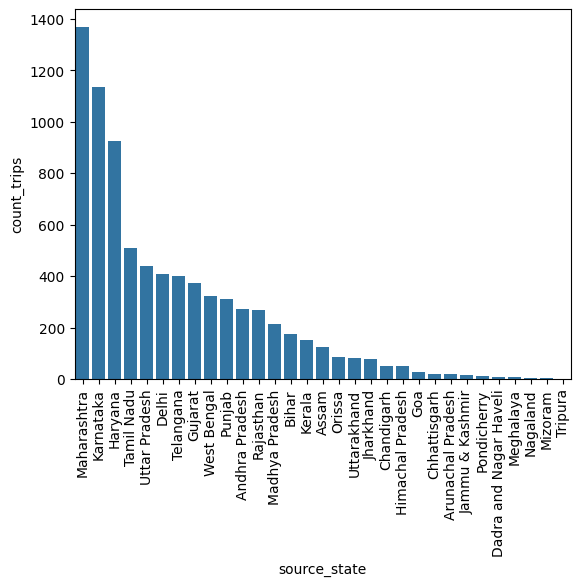

In [84]:
sns.barplot(data=orders_from_df,x='source_state',y='count_trips')
plt.xticks(rotation=90)
plt.show()

In [85]:
## To Which State Most orders are going

orders_to_df=df.groupby('destination_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
orders_to_df=orders_to_df.sort_values(by='count_trips', ascending=False)
orders_to_df

,destination_state,count_trips
18,Maharashtra,1318
15,Karnataka,1171
11,Haryana,914
26,Tamil Nadu,500
29,Uttar Pradesh,448
27,Telangana,418
10,Gujarat,388
24,Punjab,343
8,Delhi,338
31,West Bengal,337


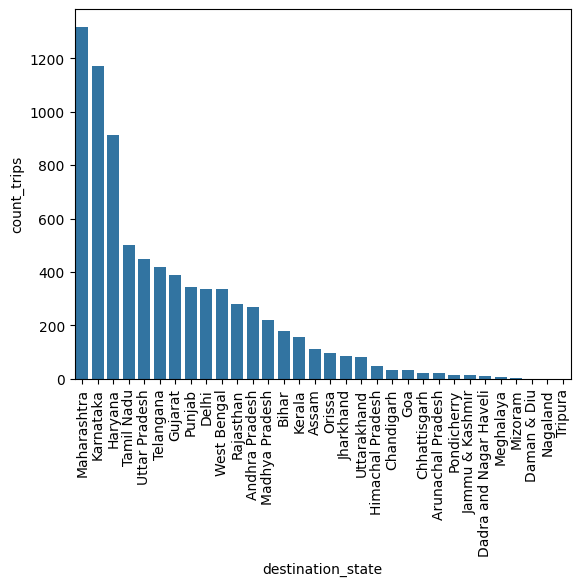

In [86]:
sns.barplot(data=orders_to_df,x='destination_state',y='count_trips')
plt.xticks(rotation=90)
plt.show()

In [87]:
## Most Busiest Corridor
# corriodor_df=df[['source_center','destination_center','actual_time','osrm_time', 'osrm_distance']]

df['corridor']=df.apply(lambda x:"#".join([x['source_center'],x['destination_center']]), axis=1)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs,destination_state,source_state,corridor
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865,Karnataka,Karnataka,IND561203AAB#IND562101AAA
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865,Karnataka,Karnataka,IND561203AAB#IND562101AAA
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865,Karnataka,Karnataka,IND561203AAB#IND562101AAA
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865,Karnataka,Karnataka,IND572101AAA#IND561203AAB
4,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865,Karnataka,Karnataka,IND572101AAA#IND561203AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70742,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,...,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331,Uttar Pradesh,Uttar Pradesh,IND209304AAA#IND208006AAA
70743,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,Karnataka,Karnataka,IND583119AAA#IND583101AAA
70744,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,Karnataka,Karnataka,IND583119AAA#IND583101AAA
70745,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,Karnataka,Karnataka,IND583201AAA#IND583119AAA


In [88]:
corridor_total_trips=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(total_trips=('trip_uuid','nunique')).reset_index()
corridor_total_trips

,corridor,total_trips
0,IND000000AAL#IND411033AAA,10
1,IND000000AAS#IND783370AAC,3
2,IND000000AAZ#IND444203AAA,1
3,IND000000AAZ#IND444303AAA,1
4,IND000000ABA#IND683565AAA,3
...,...,...
2329,IND854326AAB#IND854334AAA,1
2330,IND854334AAA#IND852118AAA,6
2331,IND854334AAA#IND854335AAA,1
2332,IND854335AAA#IND852111AAA,10


In [89]:
corridor_actual_time_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_actual_time_mean=('segment_actual_time_cumsum','mean')).reset_index()
corridor_actual_time_mean_df

,corridor,corridor_actual_time_mean
0,IND000000AAL#IND411033AAA,89.100000
1,IND000000AAS#IND783370AAC,59.666667
2,IND000000AAZ#IND444203AAA,287.000000
3,IND000000AAZ#IND444303AAA,159.000000
4,IND000000ABA#IND683565AAA,39.333333
...,...,...
2329,IND854326AAB#IND854334AAA,171.000000
2330,IND854334AAA#IND852118AAA,28.333333
2331,IND854334AAA#IND854335AAA,40.000000
2332,IND854335AAA#IND852111AAA,42.100000


In [90]:
corridor_osrm_time_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_dsrm_time_mean=('segment_osrm_time_cumsum','mean')).reset_index()
corridor_osrm_time_mean_df

,corridor,corridor_dsrm_time_mean
0,IND000000AAL#IND411033AAA,30.300000
1,IND000000AAS#IND783370AAC,29.666667
2,IND000000AAZ#IND444203AAA,77.000000
3,IND000000AAZ#IND444303AAA,68.000000
4,IND000000ABA#IND683565AAA,17.666667
...,...,...
2329,IND854326AAB#IND854334AAA,47.000000
2330,IND854334AAA#IND852118AAA,21.500000
2331,IND854334AAA#IND854335AAA,28.000000
2332,IND854335AAA#IND852111AAA,19.300000


In [91]:
corridor_osrm_distance_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_osrm_distance_mean=('segment_osrm_distance_cumsum','mean')).reset_index()
corridor_osrm_distance_mean_df

,corridor,corridor_osrm_distance_mean
0,IND000000AAL#IND411033AAA,28.973370
1,IND000000AAS#IND783370AAC,42.306800
2,IND000000AAZ#IND444203AAA,109.306700
3,IND000000AAZ#IND444303AAA,93.706900
4,IND000000ABA#IND683565AAA,14.878233
...,...,...
2329,IND854326AAB#IND854334AAA,67.378600
2330,IND854334AAA#IND852118AAA,23.968000
2331,IND854334AAA#IND854335AAA,35.023600
2332,IND854335AAA#IND852111AAA,27.922840


In [92]:
corridor_aggregated_df=pd.concat(
    objs=(
            iDF.set_index('corridor') for iDF in (corridor_total_trips,
                                                  corridor_actual_time_mean_df,
                                                  corridor_osrm_distance_mean_df,
                                                   corridor_osrm_time_mean_df
                                                 )
         ),
    axis=1,
    join='inner'
).reset_index()
corridor_aggregated_df

,corridor,total_trips,corridor_actual_time_mean,corridor_osrm_distance_mean,corridor_dsrm_time_mean
0,IND000000AAL#IND411033AAA,10,89.100000,28.973370,30.300000
1,IND000000AAS#IND783370AAC,3,59.666667,42.306800,29.666667
2,IND000000AAZ#IND444203AAA,1,287.000000,109.306700,77.000000
3,IND000000AAZ#IND444303AAA,1,159.000000,93.706900,68.000000
4,IND000000ABA#IND683565AAA,3,39.333333,14.878233,17.666667
...,...,...,...,...,...
2329,IND854326AAB#IND854334AAA,1,171.000000,67.378600,47.000000
2330,IND854334AAA#IND852118AAA,6,28.333333,23.968000,21.500000
2331,IND854334AAA#IND854335AAA,1,40.000000,35.023600,28.000000
2332,IND854335AAA#IND852111AAA,10,42.100000,27.922840,19.300000


In [93]:
## Busiest Corridor By Trips
top_20Trips_corridor_df=corridor_aggregated_df[['corridor','total_trips']].sort_values(by='total_trips', ascending=False)[:20]
top_20Trips_corridor_df

,corridor,total_trips
1491,IND562132AAA#IND560300AAA,69
1490,IND562132AAA#IND560099AAB,68
904,IND411033AAA#IND421302AAG,67
965,IND421302AAG#IND400072AAB,57
1439,IND560099AAB#IND560300AAA,54
61,IND000000ACT#IND000000ACB,52
1440,IND560099AAB#IND562132AAA,47
845,IND400072AAD#IND421302AAG,46
32,IND000000ACB#IND131028AAB,44
1452,IND560300AAA#IND560099AAB,44


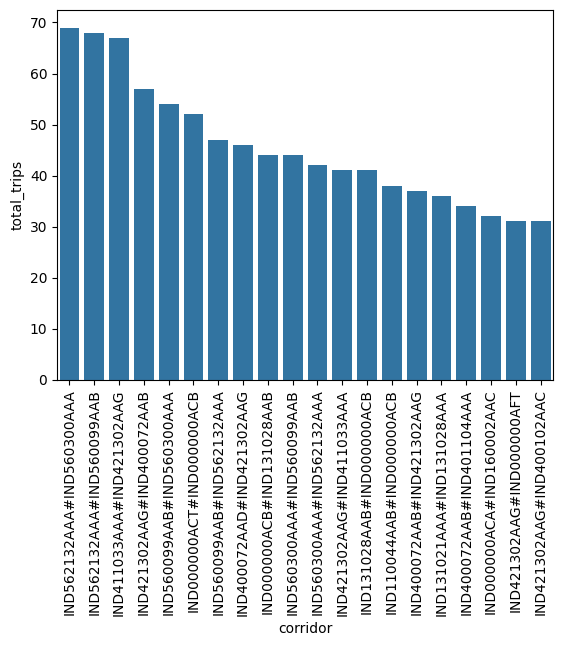

In [94]:
sns.barplot(data=top_20Trips_corridor_df,x='corridor',y='total_trips')
plt.xticks(rotation=90)
plt.show()

In [95]:
# Busiest corridor Actual time
top_20trip_time_corridor_df=corridor_aggregated_df[['corridor','corridor_actual_time_mean']].sort_values(by='corridor_actual_time_mean', ascending=False)[:20]
top_20trip_time_corridor_df

,corridor,corridor_actual_time_mean
295,IND160002AAC#IND562132AAA,3751.000000
2112,IND781018AAB#IND110037AAM,3448.800000
103,IND110037AAM#IND781018AAB,3281.000000
1948,IND712311AAA#IND781018AAB,3280.000000
1501,IND562132AAA#IND712311AAA,3274.000000
53,IND000000ACB#IND600056AAB,3217.666667
1933,IND712311AAA#IND421302AAG,3202.500000
981,IND421302AAG#IND712311AAA,2893.333333
52,IND000000ACB#IND562132AAA,2867.571429
294,IND160002AAC#IND421302AAG,2867.000000


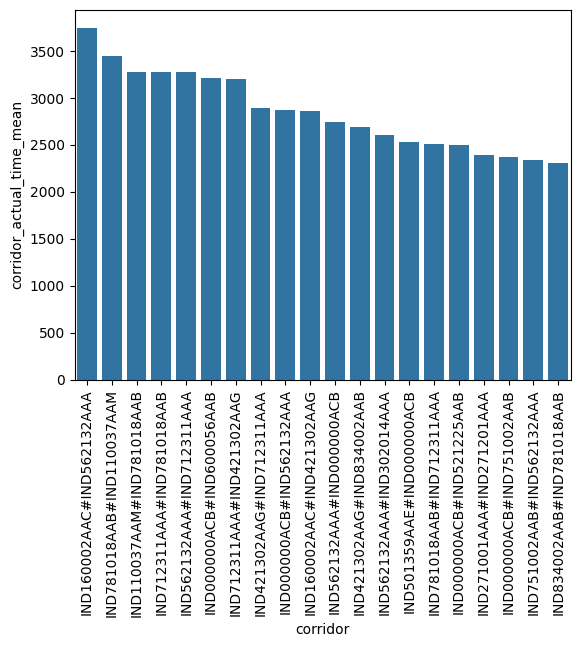

In [96]:
sns.barplot(data=top_20trip_time_corridor_df,x='corridor',y='corridor_actual_time_mean')
plt.xticks(rotation=90)
plt.show()

In [97]:
corridor_aggregated_df[['corridor_actual_time_mean','corridor_osrm_distance_mean','corridor_dsrm_time_mean','total_trips']].corr()

,corridor_actual_time_mean,corridor_osrm_distance_mean,corridor_dsrm_time_mean,total_trips
corridor_actual_time_mean,1.000000,0.934810,0.929353,0.011119
corridor_osrm_distance_mean,0.934810,1.000000,0.995754,0.038709
corridor_dsrm_time_mean,0.929353,0.995754,1.000000,0.040542
total_trips,0.011119,0.038709,0.040542,1.000000


In [98]:
# Busiest Corridor by Distance
top_20trip_dist_corridor_df=corridor_aggregated_df[['corridor','corridor_osrm_distance_mean']].sort_values(by='corridor_osrm_distance_mean', ascending=False)[:20]
top_20trip_dist_corridor_df

,corridor,corridor_osrm_distance_mean
981,IND421302AAG#IND712311AAA,2605.806167
295,IND160002AAC#IND562132AAA,2500.214500
53,IND000000ACB#IND600056AAB,2371.033750
2112,IND781018AAB#IND110037AAM,2318.486660
1469,IND562132AAA#IND000000ACB,2311.268418
52,IND000000ACB#IND562132AAA,2293.895086
1933,IND712311AAA#IND421302AAG,2235.581150
103,IND110037AAM#IND781018AAB,2181.460700
55,IND000000ACB#IND751002AAB,2127.982300
51,IND000000ACB#IND521225AAB,2069.906140


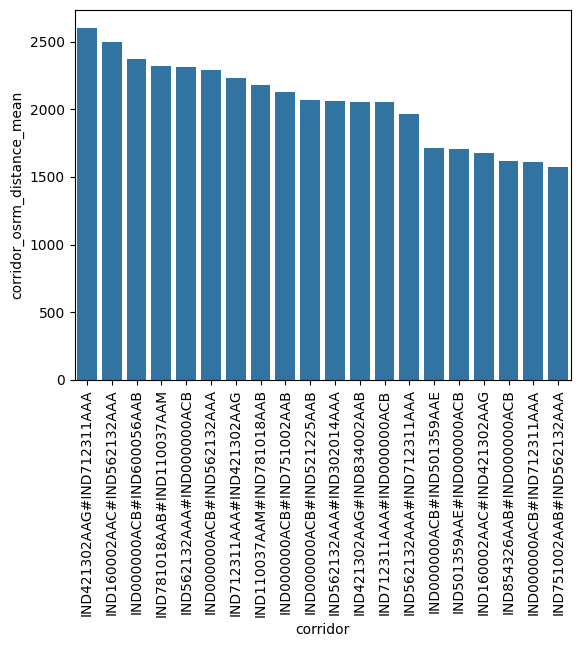

In [99]:
sns.barplot(data=top_20trip_dist_corridor_df,x='corridor',y='corridor_osrm_distance_mean')
plt.xticks(rotation=90)
plt.show()

# ***Business Recommendations***

- Maharashtra, Karnataka, Tamil Nadu, Utter Pradesh, Telangana and Gujarat States are states where most delivery trips are done. Most Bussiest corridor are in these states.

- Business should focus on identifying best corridors to move packages very quickly, they should focus on potential reasons for difference in actual delivery time and osrm delivery time value.

- If Actual delivery time is higher than osrm time then should focus on hops which are causing delays, if delays are related to processing or logistic that should be quickly fixed.

- If Issue is not related to delivery and logistic process then should focus on identifying best route to move packages quickly.

- As per analysis, It is recommended to use Carting (small vehicles) for delivery with in the city in order to reduce the delivery time, and Heavy trucks for long distance trips or heavy load. based on this , we can optimize the delivery time as well as increase the revenue as per requirements.
- Incresing the connectivity in tier 2 and tier 3 cities along with profession tie-ups with several e-commerce giants can increase the revenue as well as the reputation on connectivity across borders.
We can work on optimizing the scanning time on both ends which is start scanning time and end scanning time so that the delivery time can be equated to the OSRM estimated delivery time.
- Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.
- North, South and West Zones comidors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone.
- However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.
- From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.